# Results Benchmark 

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from collections import Counter
from IPython.display import display

 


The results analysed here are for the [Homberger CVRPTW datasets](https://www.sintef.no/projectweb/top/vrptw/homberger-benchmark/). The output files contain scores for 

In [329]:
result_files = ["output_200.csv", "output_400.csv", "output_600.csv", "output_800.csv", "output_1000.csv" ]

results_dfs = {}
for file in result_files:
    results_dfs[file] =pd.read_csv(file)
    


Due to how optaplanner works in computing scores, the scores are negative values (it maximizes, so minimizing is achieved by negating the score). We can simply multiply this with $-1$ to get the actual value. 

In [330]:
def load_and_ready_data(file_name):
    """
    Retrieve data form dictionary and multiply values by -1. 
    """
    results = results_dfs[file_name]
    for column in results.columns:
        if is_numeric_dtype(results[column]):
            results[column] = results[column] * -1
    return results

def plot_boxen_plots(results):
    """Plot boxen plot"""
    melted_df = results.melt(id_vars=["problem", "solver"], value_vars=["unassignedjobs", "violations","noVehicles" ,"totalDistance"])
    sns.catplot(x="solver", col="variable", data=melted_df, kind="boxen", y="value", sharey=False)
    
def print_statistics(results):
    """Print statistics""" 
    results_ortools_df = results[results["solver"] == "ortools"]
    results_optaplanner_df = results[results["solver"] == "optaplanner"]
    print("OR-tools")
    display(results_ortools_df.describe().T)
    print("Optaplanner")
    display(results_optaplanner_df.describe().T)

In [331]:
def get_winner(entry, ignore_score_levels = []):
    ortools_entry = entry[entry["solver"] == "ortools"]
    optaplanner_entry = entry[entry["solver"] == "optaplanner"]
    for column in ["unassignedjobs", "violations", "noVehicles", "totalDistance"]:
        if not column in ignore_score_levels:
            difference = ortools_entry[column].values - optaplanner_entry[column].values
            difference = difference[0]
            if difference == 0:
                continue
            elif difference < 0:
                return "ortools"
            elif difference > 0:
                return "optaplanner"
            
    return "equal"

In [332]:
def compute_dominating_solver(results, ignore_score_levels = []):
    compare_score_results = []
    for problemset in results["problem"].unique():
        entry = results[results["problem"] == problemset]
        compare_score_results.append(get_winner(entry, ignore_score_levels))

    print(Counter(compare_score_results))

## Problem set with 200 nodes

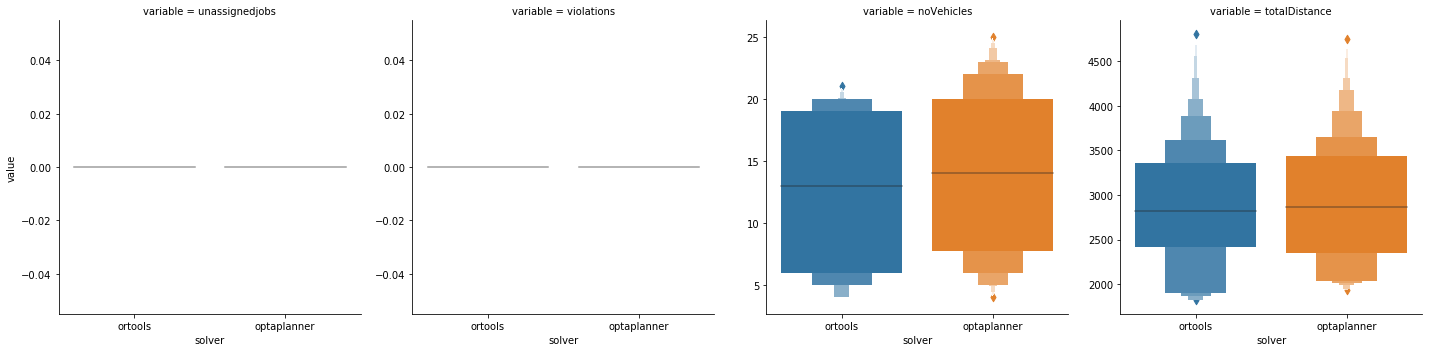

In [333]:
results_200 = load_and_ready_data("output_200.csv")
plot_boxen_plots(results_200)

In [334]:
plot_statistics(results_200)

OR-tools


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
violations,60.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
noVehicles,60.0,12.583333,6.737931,4.0,6.00,13.0,19.0,21.0
totalDistance,60.0,2866.783333,700.758695,1821.0,2417.25,2820.0,3359.5,4806.0


Optaplanner


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
violations,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
noVehicles,60.0,14.116667,6.972322,4.0,7.75,14.0,20.00,25.0
totalDistance,60.0,2930.750000,677.324263,1929.0,2353.50,2861.5,3436.25,4755.0


In [335]:
compute_dominating_solver(results_200)

Counter({'ortools': 56, 'optaplanner': 4})


# Problem set with 400 nodes

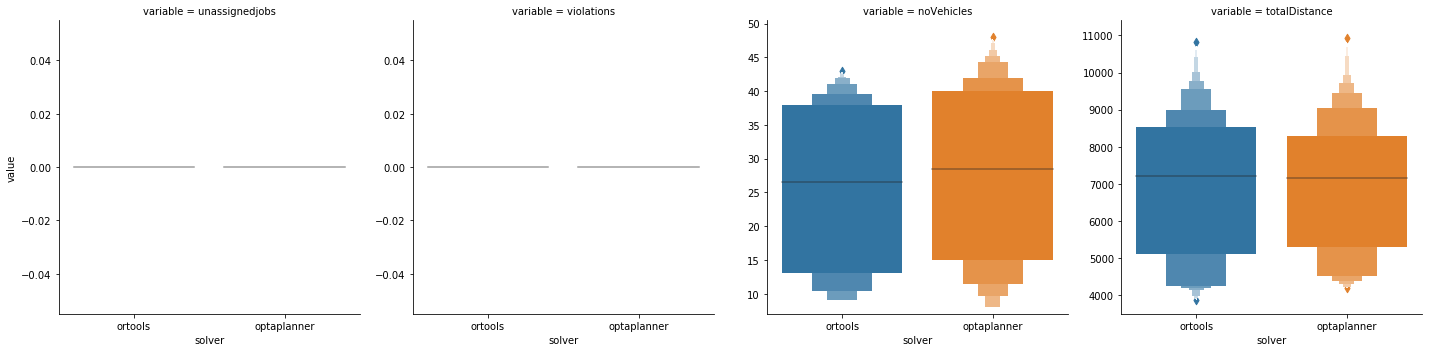

In [336]:
results_400 = load_and_ready_data("output_400.csv")
plot_boxen_plots(results_400)

In [338]:
plot_statistics(results_400)

OR-tools


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
violations,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
noVehicles,60.0,25.350000,13.395958,9.0,13.00,26.5,38.00,43.0
totalDistance,60.0,6931.483333,1923.134848,3872.0,5114.25,7218.0,8520.25,10815.0


Optaplanner


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
violations,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
noVehicles,60.0,27.766667,13.761118,8.0,15.00,28.5,40.00,48.0
totalDistance,60.0,6953.600000,1780.222679,4199.0,5295.25,7147.5,8278.25,10943.0


In [320]:
compute_dominating_solver(results_400)

Counter({'ortools': 45, 'optaplanner': 15})


# Problem set with 600 nodes

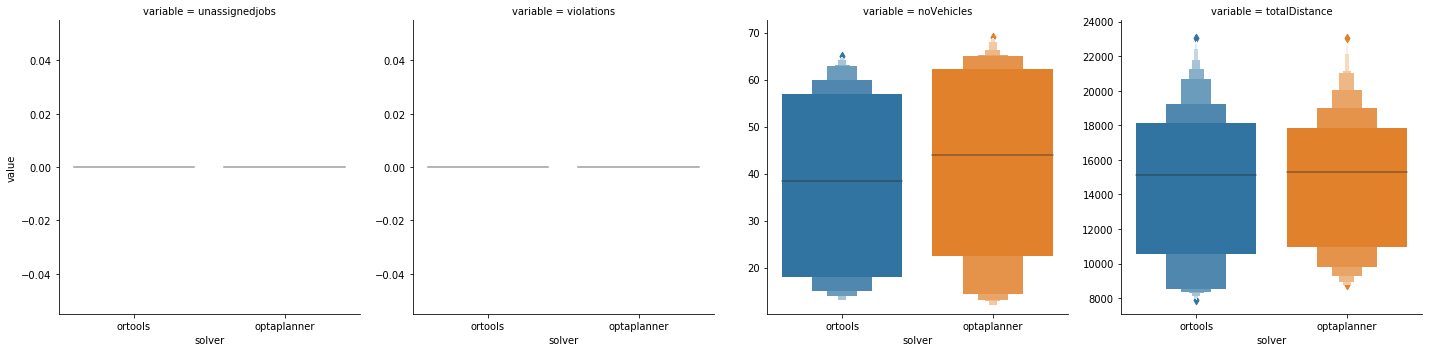

In [339]:
results_600 = load_and_ready_data("output_600.csv")
plot_boxen_plots(results_600)

In [340]:
plot_statistics(results_600)

OR-tools


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
violations,60.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
noVehicles,60.0,38.0,20.586321,13.0,18.0,38.5,57.0,65.0
totalDistance,60.0,14407.1,4372.844006,7889.0,10553.0,15098.5,18143.5,23029.0


Optaplanner


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
violations,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
noVehicles,60.0,41.800000,20.984094,12.0,22.50,44.0,62.25,69.0
totalDistance,60.0,14777.383333,3849.000016,8742.0,10974.75,15295.5,17864.75,23074.0


In [341]:
compute_dominating_solver(results_600)

Counter({'ortools': 47, 'optaplanner': 13})


# Problem set with 800 nodes

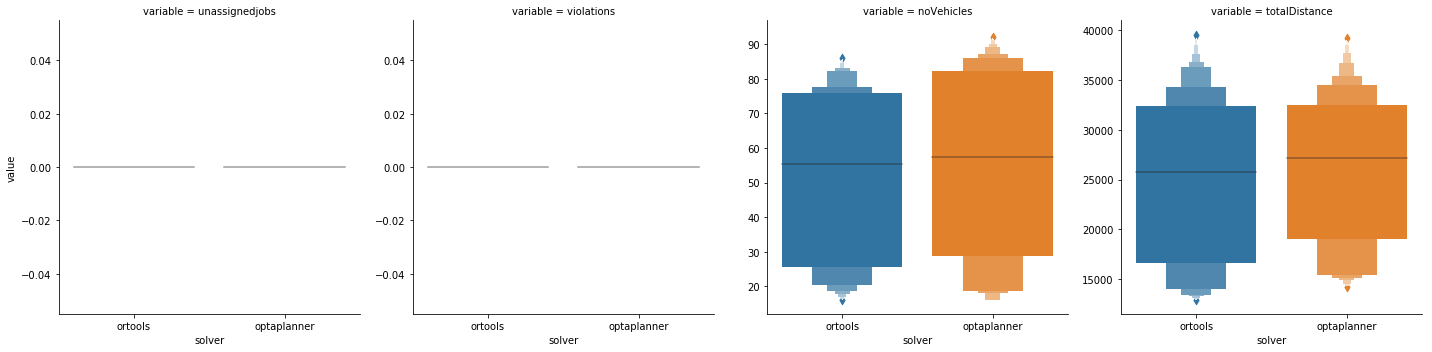

In [342]:
results_800 = load_and_ready_data("output_800.csv")
plot_boxen_plots(results_800)

In [343]:
plot_statistics(results_800)

OR-tools


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
violations,60.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
noVehicles,60.0,50.683333,26.517338,16.0,25.50,55.5,76.0,86.0
totalDistance,60.0,24740.716667,8128.676920,12891.0,16604.25,25800.0,32376.5,39507.0


Optaplanner


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
violations,60.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
noVehicles,60.0,55.400000,27.890342,16.0,28.75,57.5,82.25,92.0
totalDistance,60.0,25850.016667,7471.089364,14237.0,18995.75,27184.5,32534.25,39280.0


In [344]:
compute_dominating_solver(results_800)

Counter({'ortools': 48, 'optaplanner': 12})


# Problem set with 1000 nodes

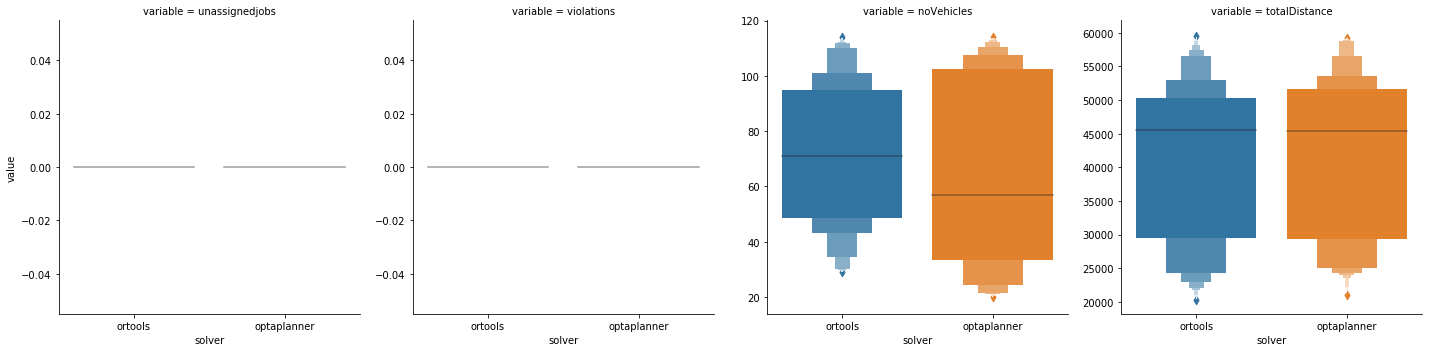

In [345]:
results_1000 = load_and_ready_data("output_1000.csv")
plot_boxen_plots(results_1000)

In [346]:
plot_statistics(results_1000)

OR-tools


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,59.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
violations,59.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
noVehicles,59.0,73.033898,26.749132,29.0,48.5,71.0,95.0,114.0
totalDistance,59.0,40843.508475,11808.559100,20260.0,29415.0,45544.0,50264.5,59491.0


Optaplanner


,count,mean,std,min,25%,50%,75%,max
unassignedjobs,59.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
violations,59.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
noVehicles,59.0,68.779661,34.95863,20.0,33.5,57.0,102.5,114.0
totalDistance,59.0,41449.542373,12077.57657,20991.0,29341.0,45407.0,51681.0,59293.0


In [347]:
compute_dominating_solver(results_1000)

Counter({'optaplanner': 31, 'ortools': 28})
